In [51]:
# TRIADS CENSUS (make it a util.py)

import numpy as np
from numpy import linalg as lin

def triad_census(matrix):
    
    A   = matrix
    At  = np.transpose(A)
    AtA = np.dot(At,A)
    AAt = np.dot(A,At)    
    A2  = lin.matrix_power(A, 2)
    D2  = np.diag(np.diag(A2))
    As  = np.multiply(A,np.transpose(A))
    As2 = lin.matrix_power(As, 2)    
    A3  = lin.matrix_power(A, 3)
    D3  = np.diag(np.diag(A3))   
    As3 = lin.matrix_power(As, 3)
    
    t = np.zeros(13) # t[0] is the count for triad 1, etc.
    
    t[0]  = (np.sum(AtA) - np.trace(AtA))/2
    t[1]  = (np.sum(AAt) - np.trace(AAt))/2
    t[2]  = np.sum(A2)-np.trace(A2)
    t[3]  = np.sum(np.dot(A,D2)-As)
    t[4]  = np.sum(np.dot(At,D2)-As)
    t[5]  = (np.sum(As2)-np.trace(As2))/2
    t[6]  = np.sum(np.multiply(A2,A))
    t[7]  = np.sum(D3)/3
    t[8]  = np.sum((np.multiply(AtA,As)))/2
    t[9]  = np.sum((np.multiply(AAt,As)))/2
    t[10] = np.sum(np.multiply(A2,As))
    t[11] = np.sum(np.multiply(As2,A))
    t[12] = np.trace(As3)/6
    
    return t.astype(int)

In [210]:
# UNIX
! rm net_names.txt
#v1) ! ls database >> net_names.txt
! ls matrices >> net_names.txt

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import pandas as pd

In [212]:
# NOTES
# The input file 'Fanconi anemia and checkpoint recovery.txt'
# was fixed manually, because the node 'DSB' is not formatted in a uniform way.

In [213]:
file = open('net_names.txt')
net_names = [name.rstrip() for name in file]

In [214]:
len(net_names)

71

In [216]:
profiles = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    t = triad_census(matrix)
    profiles.append(list(t))

In [269]:
df = pd.DataFrame(profiles)
df.columns = ['t'+str(i) for i in range(1,14)]
#df['network'] = [(net_names[i].rstrip('_adjacency.txt')) for i in range(len(net_names))]
#df.set_index('network')
df.to_csv('triads_count.csv')

In [270]:
df.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,66,55,140,18,28,3,18,5,3,4,8,6,1
1,156,136,230,53,65,8,92,21,6,11,22,5,0
2,199,160,306,39,37,2,51,10,3,0,7,0,0
3,34,44,78,37,30,8,25,6,8,8,13,9,1
4,46,58,93,12,8,0,2,1,0,0,0,0,0


In [271]:
norm = df.sum(axis=1,numeric_only=True)

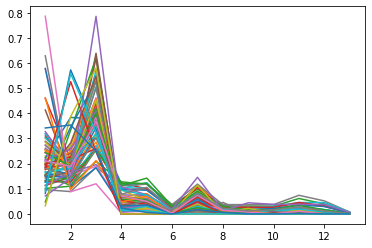

In [272]:
for i in range(len(df)):
    pr = np.array(df.loc[i])[:13]/norm.loc[i]
    t = np.arange(1,14)
    plt.plot(t,pr)

In [266]:
df.mean(axis=1,numeric_only=True)

0      27.307692
1      61.923077
2      62.615385
3      23.153846
4      16.923077
         ...    
66     21.538462
67    216.230769
68      2.384615
69      5.923077
70     39.384615
Length: 71, dtype: float64

# Random

In [273]:
#random non symmetric with n, p
def random_adj_matrix(N,p):
    A = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            if rn.random() < p and i!=j:
                A[i][j] = 1
    return A

In [395]:
rand_profiles_mean = []
rand_profiles_std = []
ensemble_size = 100

for net_num in range(len(net_names)):
    ensemble = []

    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    p = np.sum(matrix)/(n**2)

    for _ in range(ensemble_size):
        random_matrix = random_adj_matrix(n,p)
        t = list(triad_census(random_matrix))
        ensemble.append(t)

    m = np.mean(ensemble,axis = 0)
    s = np.std(ensemble,axis = 0)
    
    rand_profiles_mean.append(m)
    rand_profiles_std.append(s)
    
    print(net_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [396]:
df_rand_mean = pd.DataFrame(rand_profiles_mean)
df_rand_std  = pd.DataFrame(rand_profiles_std)

In [397]:
result = np.zeros((len(df),13))

for i in range(len(df)):
    for j in range(13):
        
        tij = np.array(df)[i,j]
        rij = np.array(df_rand_mean)[i,j]
        sij = np.array(df_rand_std)[i,j]
        
        dij = tij - rij
        
        if(dij == 0 and sij == 0):
            result[i,j] = 1
        else:
            result[i,j] = dij/sij

<ipython-input-397-275d74438c9e>:15: RuntimeWarning: divide by zero encountered in double_scalars
  result[i,j] = dij/sij


In [398]:
df_result = pd.DataFrame(result)

In [399]:
df_result

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.411871,-0.280681,0.648711,3.145924,5.378042,11.483575,4.393186,2.735839,7.866705,10.069757,15.957147,inf,inf
1,1.792430,0.966552,0.143720,-0.587842,-0.196991,-0.386623,0.884297,-0.341254,-0.858834,-0.046744,-0.036849,-0.333825,-0.563235
2,1.909428,0.574731,0.316245,2.324334,2.378689,1.850854,7.371508,2.360276,4.286070,-0.658218,6.909910,-0.192450,1.000000
3,0.691980,1.553498,1.271830,8.677862,6.563053,24.249024,6.767826,3.308466,15.510446,13.038361,17.146428,45.723809,inf
4,0.261912,1.005557,0.244701,0.749243,0.135027,-0.488514,-1.073178,-0.764801,-0.465177,-0.480822,-0.653882,-0.229416,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.478168,0.170416,0.037734,2.217344,1.022585,1.173754,2.742121,0.714025,2.664318,-0.604165,2.473409,-0.252646,1.000000
67,3.236176,1.094270,1.553249,2.576667,4.959462,5.936670,4.825997,3.040406,5.188580,10.054661,7.488502,12.183546,13.535528
68,-1.643580,0.910078,0.372603,-0.479421,-0.524142,1.000000,-0.814069,-0.415581,-0.142857,-0.100504,-0.100504,1.000000,1.000000
69,-1.314600,5.039341,-0.455706,-0.102669,-0.135617,-0.217072,-0.978100,-0.552705,-0.204124,-0.100504,-0.294884,1.000000,1.000000


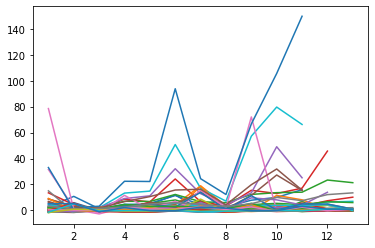

In [404]:
for i in range(len(df_result)):
    pr = np.array(df_result.loc[i])[:13]
    t = np.arange(1,14)
    plt.plot(t,pr)